<a href="https://colab.research.google.com/github/asrinivasan75/CariesClassification/blob/main/DentalImageCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

base_dir = '/content/drive/MyDrive/Dental_Model'
nocaries_dir = os.path.join(base_dir, 'NoCaries')
cariesenamel_dir = os.path.join(base_dir, 'CariesEnamel')
cariesdentine_dir = os.path.join(base_dir, 'CariesDentine')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # rotate the image up to 20 degrees
    width_shift_range=0.2,    # translate the image horizontally
    height_shift_range=0.2,   # translate the image vertically
    shear_range=0.2,          # apply shearing transformations
    zoom_range=0.2,           # zoom into the image
    horizontal_flip=True,     # flip the image horizontally
    validation_split=0.2      # splitting into 80% training, 20% validation
)

# 80% Training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Use categorical for multi-class classification
    subset='training'          # 80% training data
)

# 20% Validation generator (we'll later split into 10% validation, 10% testing)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Multi-class
    subset='validation'        # 20% validation data
)

# Separate Test generator with no data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Test generator from the dataset folder
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # For 3 classes
    shuffle=False  # No shuffling for test set
)

Found 21 images belonging to 3 classes.
Found 5 images belonging to 3 classes.
Found 26 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model for multi-class classification
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # dropout to prevent overfitting

# Output layer for 3 classes
model.add(Dense(3, activation='softmax'))  # 3 categories: No Caries, Caries in Enamel, Caries in Dentine

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical crossentropy for multi-class
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 1.0823 - val_accuracy: 0.4000 - val_loss: 1.7306
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2381 - loss: 2.4443 - val_accuracy: 0.4000 - val_loss: 1.4485
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4286 - loss: 1.8355 - val_accuracy: 0.2000 - val_loss: 1.3042
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1905 - loss: 1.4169 - val_accuracy: 0.4000 - val_loss: 1.0917
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5238 - loss: 1.1074 - val_accuracy: 0.4000 - val_loss: 1.0688
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5238 - loss: 1.0879 - val_accuracy: 0.4000 - val_loss: 1.0625
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2381 - loss: 1.0744 - val_accuracy: 0.4000 - val_loss: 1.0642
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2857 - loss: 1.0774 - val_accuracy: 0.4000 - val_loss: 1.0556
Epoch 9/10
1/1 ━

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - accuracy: 0.4615 - loss: 1.0675
Test Accuracy: 46.15%


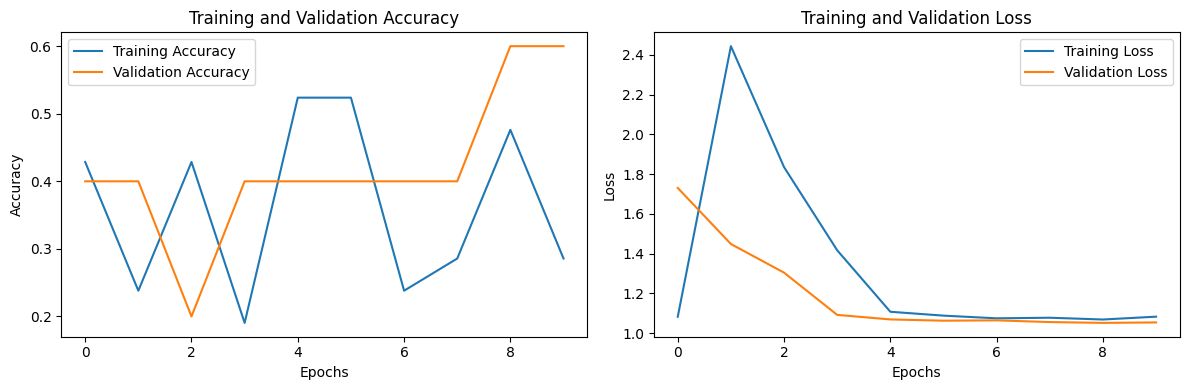

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss for both training and validation
def plot_training_history(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 4))

    # Subplot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Subplot for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot after the training completes
plot_training_history(history)